In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from prettytable import PrettyTable
from tabulate import tabulate

## Load Data

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation: Stratified Sampling</h2>

x=data.drop(['project_is_approved'],axis=1)
y=data['project_is_approved']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>


In [6]:
vectorizer=CountVectorizer()
vectorizer.fit(x_train['essay'])
bow_train_essay=vectorizer.transform(x_train['essay'])
bow_test_essay=vectorizer.transform(x_test['essay'])

In [7]:
tfidf=TfidfVectorizer()

In [8]:
tfidf.fit(x_train['essay'])
tfidf_train_essay=tfidf.transform(x_train['essay'])
tfidf_test_essay=tfidf.transform(x_test['essay'])

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>1.4.1 encoding categorical features: School State</h3>

In [10]:
vectorizer.fit(x_train['school_state'])
bow_train_school=vectorizer.transform(x_train['school_state'])
bow_test_school=vectorizer.transform(x_test['school_state'])

In [11]:
tfidf.fit(x_train['school_state'])
tfidf_train_school=tfidf.transform(x_train['school_state'])
tfidf_test_school=tfidf.transform(x_test['school_state'])

<h3>1.4.2 encoding categorical features: teacher_prefix</h3>

In [12]:
vectorizer.fit(x_train['teacher_prefix'])
bow_train_teacher_prefix=vectorizer.transform(x_train['teacher_prefix'])
bow_test_teacher_prefix=vectorizer.transform(x_test['teacher_prefix'])

In [13]:
tfidf.fit(x_train['teacher_prefix'])
tfidf_train_teacher_prefix=tfidf.transform(x_train['teacher_prefix'])
tfidf_test_teacher_prefix=tfidf.transform(x_test['teacher_prefix'])

<h3>1.4.3 encoding categorical features: project_grade_category</h3>

In [14]:
vectorizer.fit(x_train['project_grade_category'])
bow_train_project_grade_category=vectorizer.transform(x_train['project_grade_category'])
bow_test_project_grade_category=vectorizer.transform(x_test['project_grade_category'])

In [15]:
tfidf.fit(x_train['project_grade_category'])
tfidf_train_project_grade_category=tfidf.transform(x_train['project_grade_category'])
tfidf_test_project_grade_category=tfidf.transform(x_test['project_grade_category'])

<h3>1.4.4 encoding categorical features: clean_categories</h3>

In [16]:
vectorizer.fit(x_train['clean_categories'])
bow_train_clean_categories=vectorizer.transform(x_train['clean_categories'])
bow_test_clean_categories=vectorizer.transform(x_test['clean_categories'])

In [17]:
tfidf.fit(x_train['clean_categories'])
tfidf_train_clean_categories=tfidf.transform(x_train['clean_categories'])
tfidf_test_clean_categories=tfidf.transform(x_test['clean_categories'])

<h3>1.4.5 encoding categorical features: clean_subcategories</h3>

In [18]:
vectorizer.fit(x_train['clean_subcategories'])
bow_train_clean_subcategories=vectorizer.transform(x_train['clean_subcategories'])
bow_test_clean_subcategories=vectorizer.transform(x_test['clean_subcategories'])

In [19]:
tfidf.fit(x_train['clean_subcategories'])
tfidf_train_clean_subcategories=tfidf.transform(x_train['clean_subcategories'])
tfidf_test_clean_subcategories=tfidf.transform(x_test['clean_subcategories'])

<h3>1.4.6 encoding numerical features: price</h3>

In [20]:
standard=Normalizer()
standard.fit(x_train['price'].values.reshape(1,-1))
x_train_price=standard.transform(x_train['price'].values.reshape(1,-1))
x_test_price=standard.transform(x_test['price'].values.reshape(1,-1))
x_train_price=x_train_price.reshape(-1,1)
x_test_price=x_test_price.reshape(-1,1)

<h3>1.4.7 encoding numerical features:  teacher_number_of_previously_posted_projects</h3>


In [21]:
standard.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_teacher_number_of_previously_posted_projects=standard.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_number_of_previously_posted_projects=standard.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_teacher_number_of_previously_posted_projects=x_train_teacher_number_of_previously_posted_projects.reshape(-1,1)
x_test_teacher_number_of_previously_posted_projects=x_test_teacher_number_of_previously_posted_projects.reshape(-1,1)

<h3>1.4.8 Concatinating all the features</h3>

In [22]:
bow_tr=hstack((bow_train_school,bow_train_teacher_prefix,bow_train_project_grade_category,x_train_teacher_number_of_previously_posted_projects,bow_train_clean_categories,bow_train_clean_subcategories,bow_train_essay,x_train_price)).tocsr()
bow_test=hstack((bow_test_school,bow_test_teacher_prefix,bow_test_project_grade_category,x_test_teacher_number_of_previously_posted_projects,bow_test_clean_categories,bow_test_clean_subcategories,bow_test_essay,x_test_price)).tocsr()
tfidf_tr=hstack((tfidf_train_school,tfidf_train_teacher_prefix,tfidf_train_project_grade_category,x_train_teacher_number_of_previously_posted_projects,tfidf_train_clean_categories,tfidf_train_clean_subcategories,tfidf_train_essay,x_train_price)).tocsr()
tfidf_test=hstack((tfidf_test_school,tfidf_test_teacher_prefix,tfidf_test_project_grade_category,x_test_teacher_number_of_previously_posted_projects,tfidf_test_clean_categories,tfidf_test_clean_subcategories,tfidf_test_essay,x_test_price)).tocsr()

# Bow Featurization


In [23]:
alpha_values={'alpha':[0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
estimator=MultinomialNB(class_prior=[0.5, 0.5])
clf=GridSearchCV(estimator,alpha_values, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(bow_tr,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

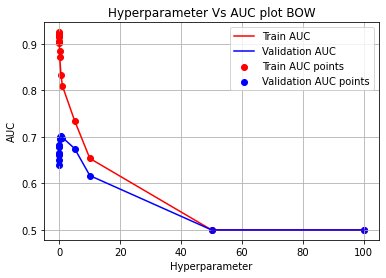

In [24]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
bow_train_auc=results['mean_train_score']
bow_test_auc=results['mean_test_score']
bow_train_auc_std=results['std_train_score']
bow_test_auc_std=results['std_test_score']
hyperparameter=results['param_alpha']


plt.plot(hyperparameter,bow_train_auc,label='Train AUC',color='red')
plt.plot(hyperparameter,bow_test_auc,label='Validation AUC',color='blue')
plt.scatter(hyperparameter, bow_train_auc, label='Train AUC points',color='red')
plt.scatter(hyperparameter, bow_test_auc, label='Validation AUC points',color='blue')
plt.legend()
plt.xlabel('Hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter Vs AUC plot BOW')
plt.grid()

plt.show()

# TFIDF Featurization

In [25]:
alpha_values={'alpha':[0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
estimator=MultinomialNB(class_prior=[0.5, 0.5])
clf1=GridSearchCV(estimator,alpha_values, cv=3, scoring='roc_auc',return_train_score=True)
clf1.fit(tfidf_tr,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

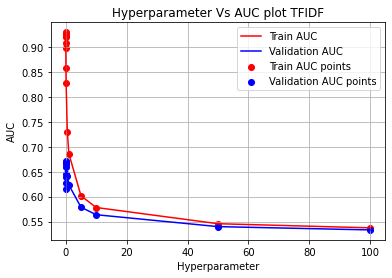

In [26]:
results = pd.DataFrame.from_dict(clf1.cv_results_)
results = results.sort_values(['param_alpha'])
tfidf_train_auc=results['mean_train_score']
tfidf_test_auc=results['mean_test_score']
tfidf_train_auc_std=results['std_train_score']
tfidf_test_auc_std=results['std_test_score']
hyperparameter=results['param_alpha']


plt.plot(hyperparameter,tfidf_train_auc,label='Train AUC',color='red')
plt.plot(hyperparameter,tfidf_test_auc,label='Validation AUC',color='blue')
plt.scatter(hyperparameter, tfidf_train_auc, label='Train AUC points',color='red')
plt.scatter(hyperparameter, tfidf_test_auc, label='Validation AUC points',color='blue')
plt.legend()
plt.xlabel('Hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter Vs AUC plot TFIDF')
plt.grid()

plt.show()

In [27]:
def batch_predict(clf, data):
    y_pred = []
    train_loop = data.shape[0] - data.shape[0]%1000

    for i in range(0, train_loop, 1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_pred.extend(clf.predict_proba(data[train_loop:])[:,1])
    
    return y_pred

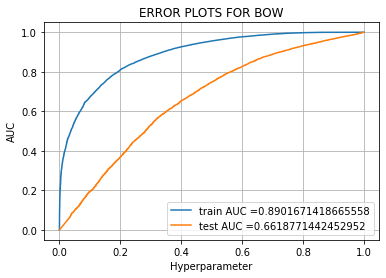

In [28]:
model=MultinomialNB(alpha=0.001,class_prior=[0.5, 0.5])
model.fit(bow_tr,y_train)
bow_y_predict=model.predict(bow_test)

y_train_predict_bow=batch_predict(model,bow_tr)
y_test_predict_bow=batch_predict(model,bow_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_predict_bow)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_predict_bow)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR BOW")
plt.grid()
plt.show()

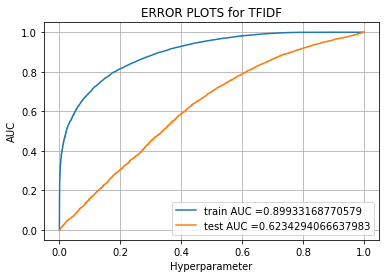

In [29]:
model1=MultinomialNB(alpha=0.01,class_prior=[0.5, 0.5])
model1.fit(tfidf_tr,y_train)
tfidf_y_predict=model1.predict(tfidf_test)

y_train_predict_tfidf=batch_predict(model,tfidf_tr)
y_test_predict_tfidf=batch_predict(model,tfidf_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_predict_tfidf)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_predict_tfidf)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS for TFIDF")
plt.grid()
plt.show()

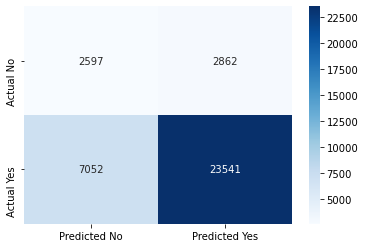

In [30]:
cm_test_bow = confusion_matrix(y_test,bow_y_predict)
sns.heatmap(cm_test_bow, annot=True,fmt="d",cmap='Blues',xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'])

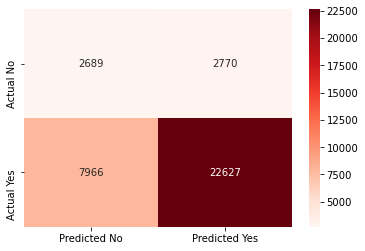

In [31]:
cm_test_tfidf = confusion_matrix(y_test,tfidf_y_predict)
sns.heatmap(cm_test_tfidf, annot=True,fmt="d",cmap='Reds',xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'])

## TOP 20 FEATURES NEGATIVE 

In [32]:
negative=model1.feature_log_prob_[0]
#print(negative)
sorted_negative=sorted(negative, reverse=True)  # sort probability from high to low
#print(sorted_negative)
sort_neg_indices=negative.argsort()[::-1] # sort indices of log prob
print(len(sort_neg_indices))

48376


In [33]:
l_neg=[]
for feature in x:
    for index in sort_neg_indices:
        if x[feature].dtype == object: 
            l_neg.extend(tfidf.get_feature_names())
        elif x[feature].dtype == 'int64' or x[feature].dtype == 'float64' :
            l_neg.append(feature)
l_neg[0:20]

['appliedsciences',
 'care_hunger',
 'charactereducation',
 'civics_government',
 'college_careerprep',
 'communityservice',
 'earlydevelopment',
 'economics',
 'environmentalscience',
 'esl',
 'extracurricular',
 'financialliteracy',
 'foreignlanguages',
 'gym_fitness',
 'health_lifescience',
 'health_wellness',
 'history_geography',
 'literacy',
 'literature_writing',
 'mathematics']

## TOP 20 FEATURES Positive 

In [34]:
positive=model1.feature_log_prob_[1]
sorted_positive=sorted(positive, reverse=True)
sort_pos_indices=positive.argsort()[::-1]
l_pos=[]
for feature in x:
    for index in sort_pos_indices:
        if x[feature].dtype == object: 
            l_pos.extend(tfidf.get_feature_names())
        elif x[feature].dtype == 'int64' or x[feature].dtype == 'float64' :
            l_pos.append(feature)
l_pos[0:20]

['appliedsciences',
 'care_hunger',
 'charactereducation',
 'civics_government',
 'college_careerprep',
 'communityservice',
 'earlydevelopment',
 'economics',
 'environmentalscience',
 'esl',
 'extracurricular',
 'financialliteracy',
 'foreignlanguages',
 'gym_fitness',
 'health_lifescience',
 'health_wellness',
 'history_geography',
 'literacy',
 'literature_writing',
 'mathematics']

In [35]:
table =[["Vectorization Technique","Hyperparameter Technique","Best Hyperparameter","AUC"],['BOW','GridSearchCV',0.001,0.66],['TFIDF','GridSearchCV',0.01,0.62]]
print(tabulate(table,tablefmt="grid"))

+-------------------------+--------------------------+---------------------+------+
| Vectorization Technique | Hyperparameter Technique | Best Hyperparameter | AUC  |
+-------------------------+--------------------------+---------------------+------+
| BOW                     | GridSearchCV             | 0.001               | 0.66 |
+-------------------------+--------------------------+---------------------+------+
| TFIDF                   | GridSearchCV             | 0.01                | 0.62 |
+-------------------------+--------------------------+---------------------+------+
